In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

gdp_life_all = pd.read_csv('all_data.csv')
print(gdp_life_all.head())
print(gdp_life_all.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


***DESCRIBE ANALYSIS***
The loaded data include 96 observation with no missing data.
GDP and Life expectancy at birth are assigned proper data type as float64

In [7]:
print(gdp_life_all.info())
print(gdp_life_all.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.75000

***EXPLORATORY ANALYSIS***
Because the main goal of this project aim to figure out the relationship between GDP and life expectancy at birth, bivariate statistic offer the most appropriate inspectation on those quantiative variable.

In [15]:
# Prepare data
gdp = gdp_life_all.GDP
life = gdp_life_all['Life expectancy at birth (years)']

# Calculate Peason correlation matrix
gdp_life_corr, p = pearsonr(gdp,life)
print(gdp_life_corr)

0.343206748449156


Correlation figure of those variable seem to reveal a possitive relationship which is not really strong.
To delve into this exploratory analysis, a scatterplot graph that is applied on those variables make up more intuitive clues than a single correlation

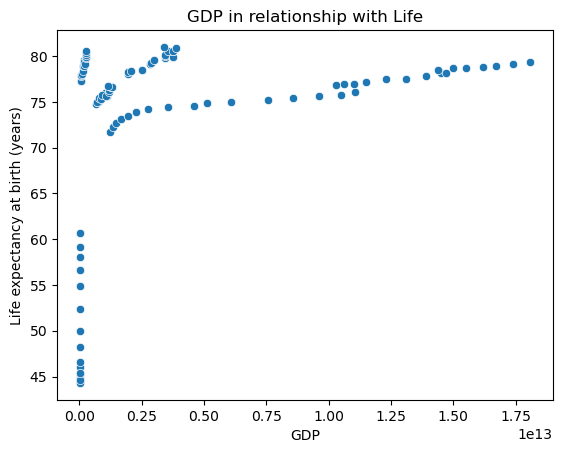

<Figure size 640x480 with 0 Axes>

In [19]:
# Draw scatter plot graph
ax = sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all)
ax.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='GDP in relationship with Life')
plt.show()
plt.clf()

There are some outliners stretching the graph vertically. Scoping the view in a limit range is an essential solution in this case

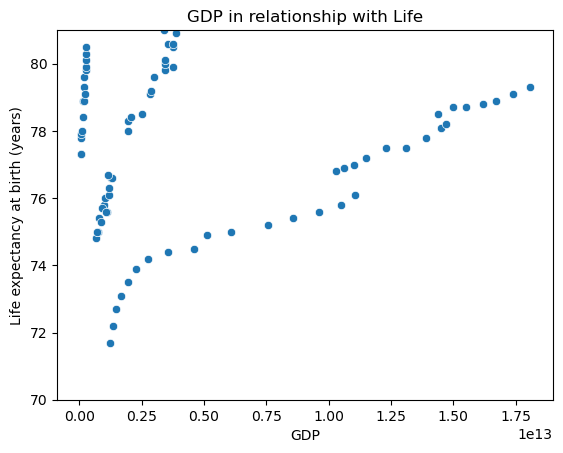

<Figure size 640x480 with 0 Axes>

In [26]:
ax = sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all)
ax.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='GDP in relationship with Life')
ax.set_ylim(70,life.max())
plt.show()
plt.clf()

The graph show a vague relationship between GDP and how long citizen's life in a certain country is.
I question that would it be different among distict countries or years

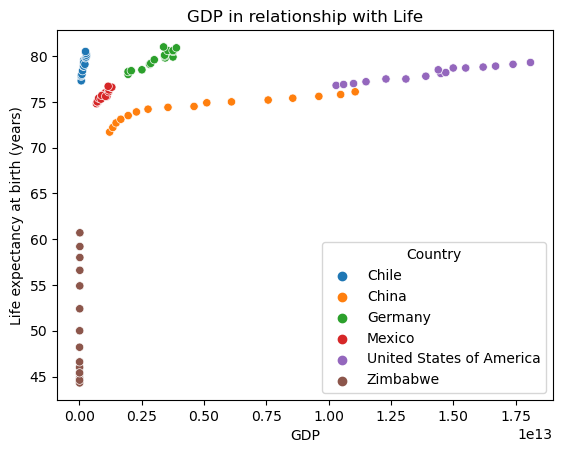

<Figure size 640x480 with 0 Axes>

In [27]:
# Check the relation among separate countries
ax = sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all, hue = 'Country')
ax.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='GDP in relationship with Life')
plt.show()
plt.clf()

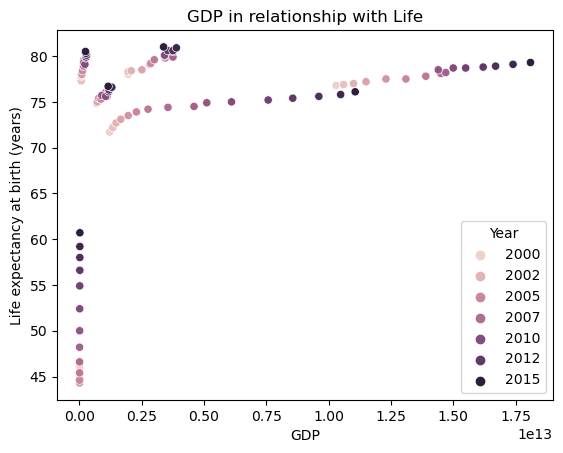

<Figure size 640x480 with 0 Axes>

In [29]:
# Check the relation among separate years
ax = sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all, hue = 'Year')
ax.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='GDP in relationship with Life')
plt.show()
plt.clf()

Now the answer seem to be more clear when the relationships is represented in distinct colors standing for different countries. As this result, I suggest to inspect how GDP influenced life expectancy of year in separated groups of countries.
Before go deeper into explainatory analysis, we need to take a glance on how the country data look like...

In [59]:
print(gdp_life_all.Country.unique())
data_by_countries = gdp_life_all.groupby('Country')
print(data_by_countries[['GDP','Life expectancy at birth (years)']].describe())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
                           GDP                                            \
                         count          mean           std           min   
Country                                                                    
Chile                     16.0  1.697888e+11  7.687884e+10  6.973681e+10   
China                     16.0  4.957714e+12  3.501096e+12  1.211350e+12   
Germany                   16.0  3.094776e+12  6.674862e+11  1.949950e+12   
Mexico                    16.0  9.766506e+11  2.095716e+11  6.836480e+11   
United States of America  16.0  1.407500e+13  2.432694e+12  1.030000e+13   
Zimbabwe                  16.0  9.062580e+09  4.298310e+09  4.415703e+09   

                                                                    \
                                   25%           50%           75%   
Country                                                              
Chile                     9.38

...and then, map the relationship between GDP and life in country manner

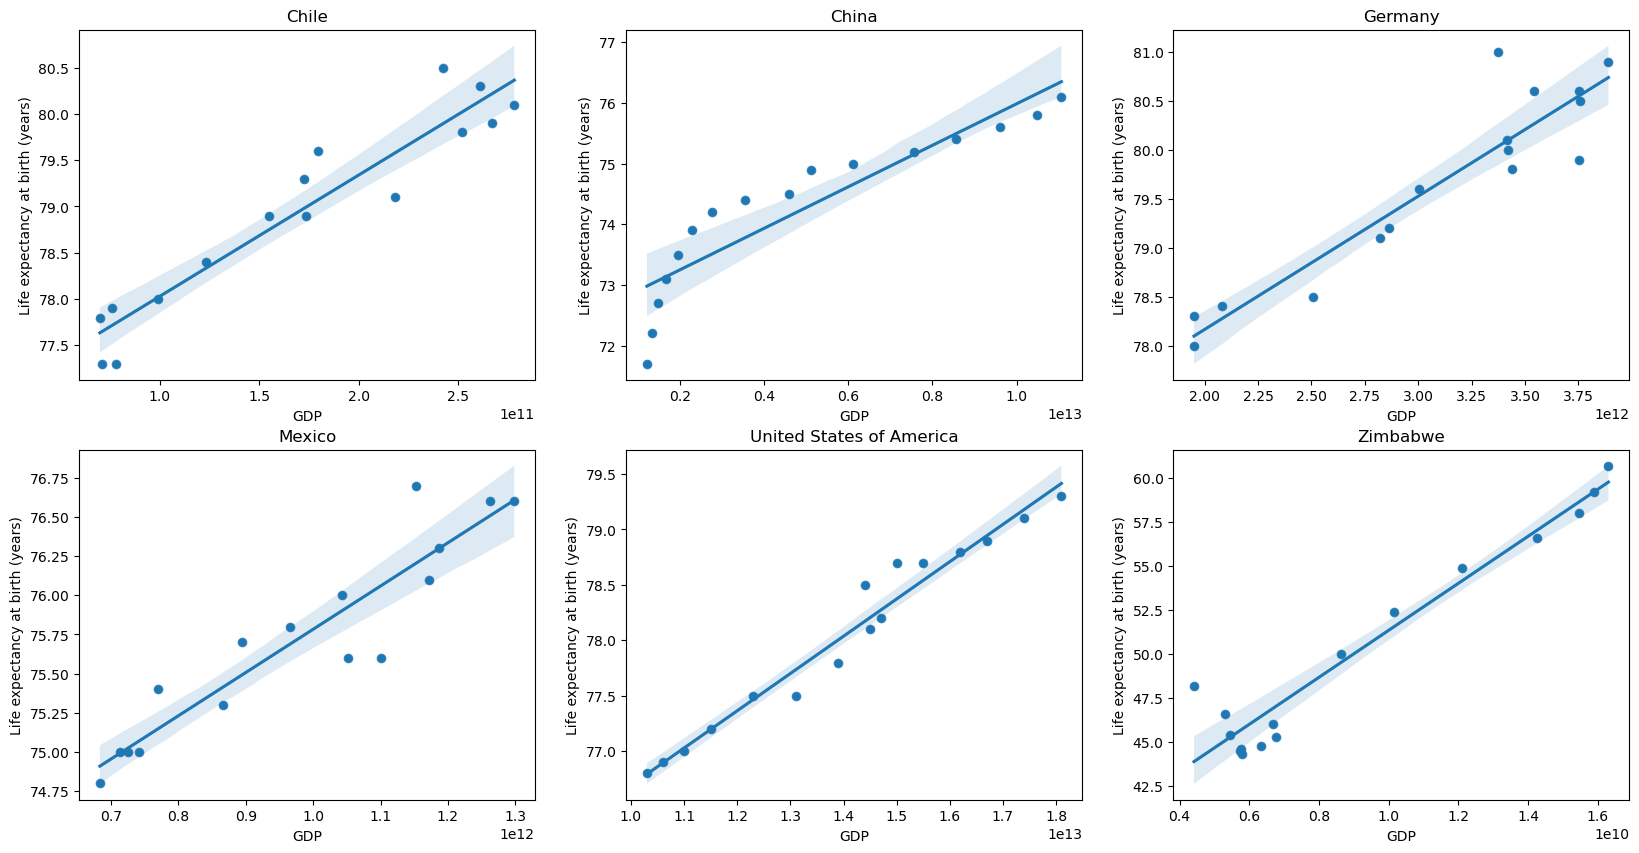

<Figure size 640x480 with 0 Axes>

In [123]:
nplots_hori=2
nplots_vert=3

# Create axes objects that share properties among x and y axes
fig, [(ax1, ax2, ax3),(ax4, ax5, ax6)] = plt.subplots(nrows=nplots_hori, ncols=nplots_vert)

sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Chile'],ax=ax1)
sns.regplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Chile'],ax=ax1)
ax1.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='Chile')
# ax1.set_aspect('auto')

sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'China'],ax=ax2)
sns.regplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'China'],ax=ax2)
ax2.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='China')
# ax2.set_aspect('auto')

sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Germany'],ax=ax3)
sns.regplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Germany'],ax=ax3)
ax3.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='Germany')
# ax3.set_aspect('auto')

sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Mexico'],ax=ax4)
sns.regplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Mexico'],ax=ax4)
ax4.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='Mexico')
# ax4.set_aspect('auto')

sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'United States of America'],ax=ax5)
sns.regplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'United States of America'],ax=ax5)
ax5.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='United States of America')
# ax5.set_aspect('auto')

sns.scatterplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Zimbabwe'],ax=ax6)
sns.regplot(x='GDP',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Zimbabwe'],ax=ax6)
ax6.set(xlabel='GDP',ylabel='Life expectancy at birth (years)',title='Zimbabwe')
# ax6.set_aspect('auto')


# Adjust graphs width and height
fig.set_figwidth(20)
fig.set_figheight(10)

# Show y axis label in the left hand side of each graph
for ax in fig.axes:
    ax.tick_params(axis='y', labelleft=True)

plt.show()
plt.clf()

Obviously, a higher GDP tend to connect with a higher life expectency at year in those studied countries while the least square regression line show a concreate upward trends in each plots.
We will see how GDP and life tendencies change over time among those countries

(2000.0, 2015.0, 70.0, 85.0)

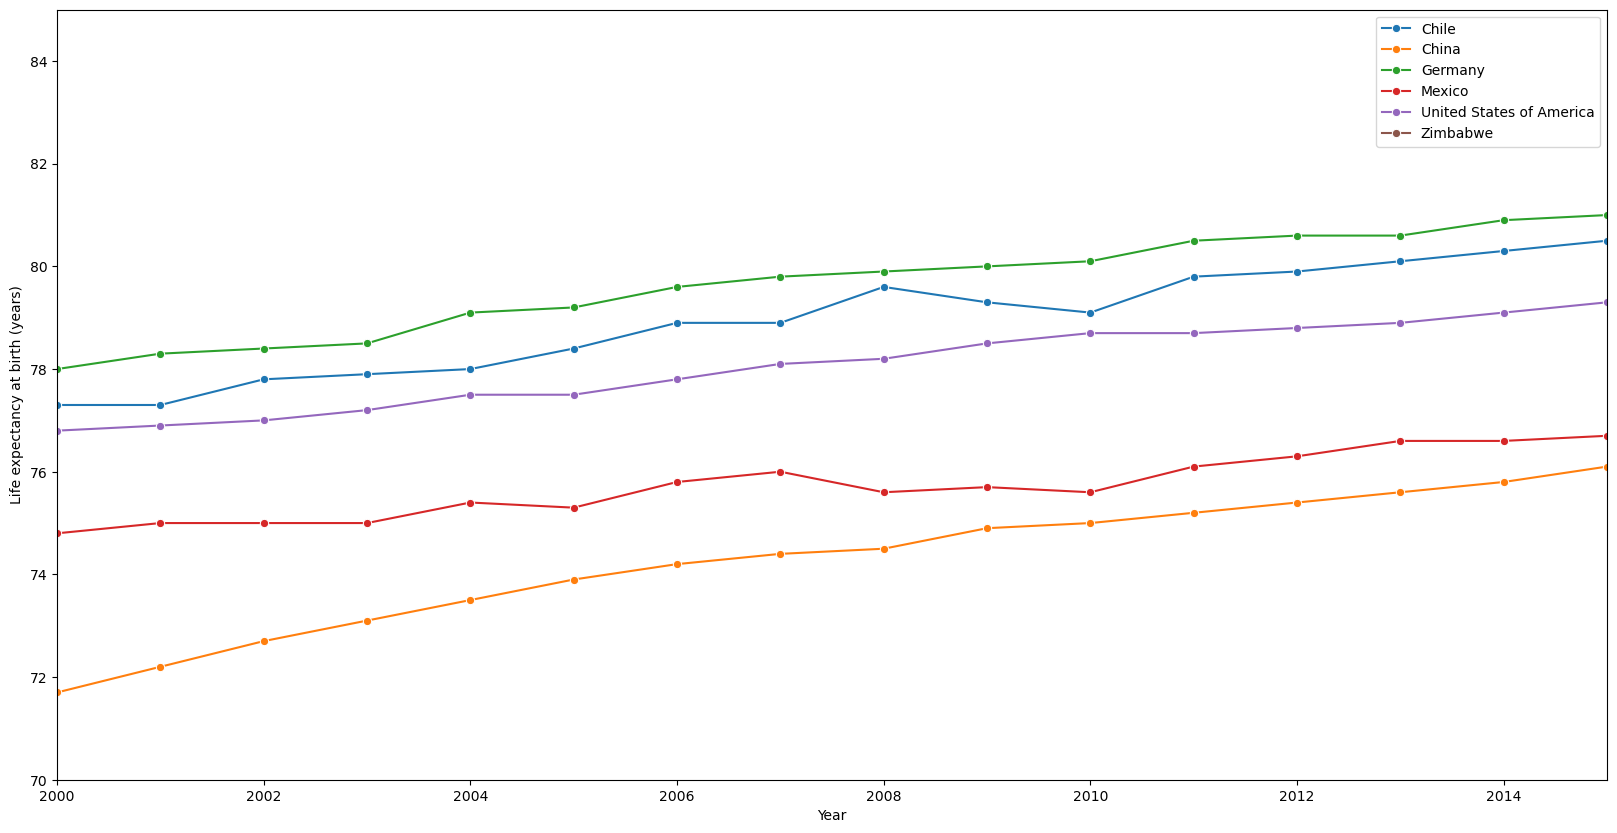

In [150]:
# Create axes objects that share properties among x and y axes
plt.figure(figsize=(20,10))

# chile_data = gdp_life_all[gdp_life_all.Country == 'Chile']
sns.lineplot(x='Year',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Chile'],marker='o')
sns.lineplot(x='Year',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'China'],marker='o')
sns.lineplot(x='Year',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Germany'],marker='o')
sns.lineplot(x='Year',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Mexico'],marker='o')
sns.lineplot(x='Year',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'United States of America'],marker='o')
sns.lineplot(x='Year',y='Life expectancy at birth (years)',data=gdp_life_all[gdp_life_all.Country == 'Zimbabwe'],marker='o')
list_of_legend = ['Chile','China','Germany','Mexico','United States of America','Zimbabwe']
plt.legend(list_of_legend)
plt.axis([2000,2015,70,85])

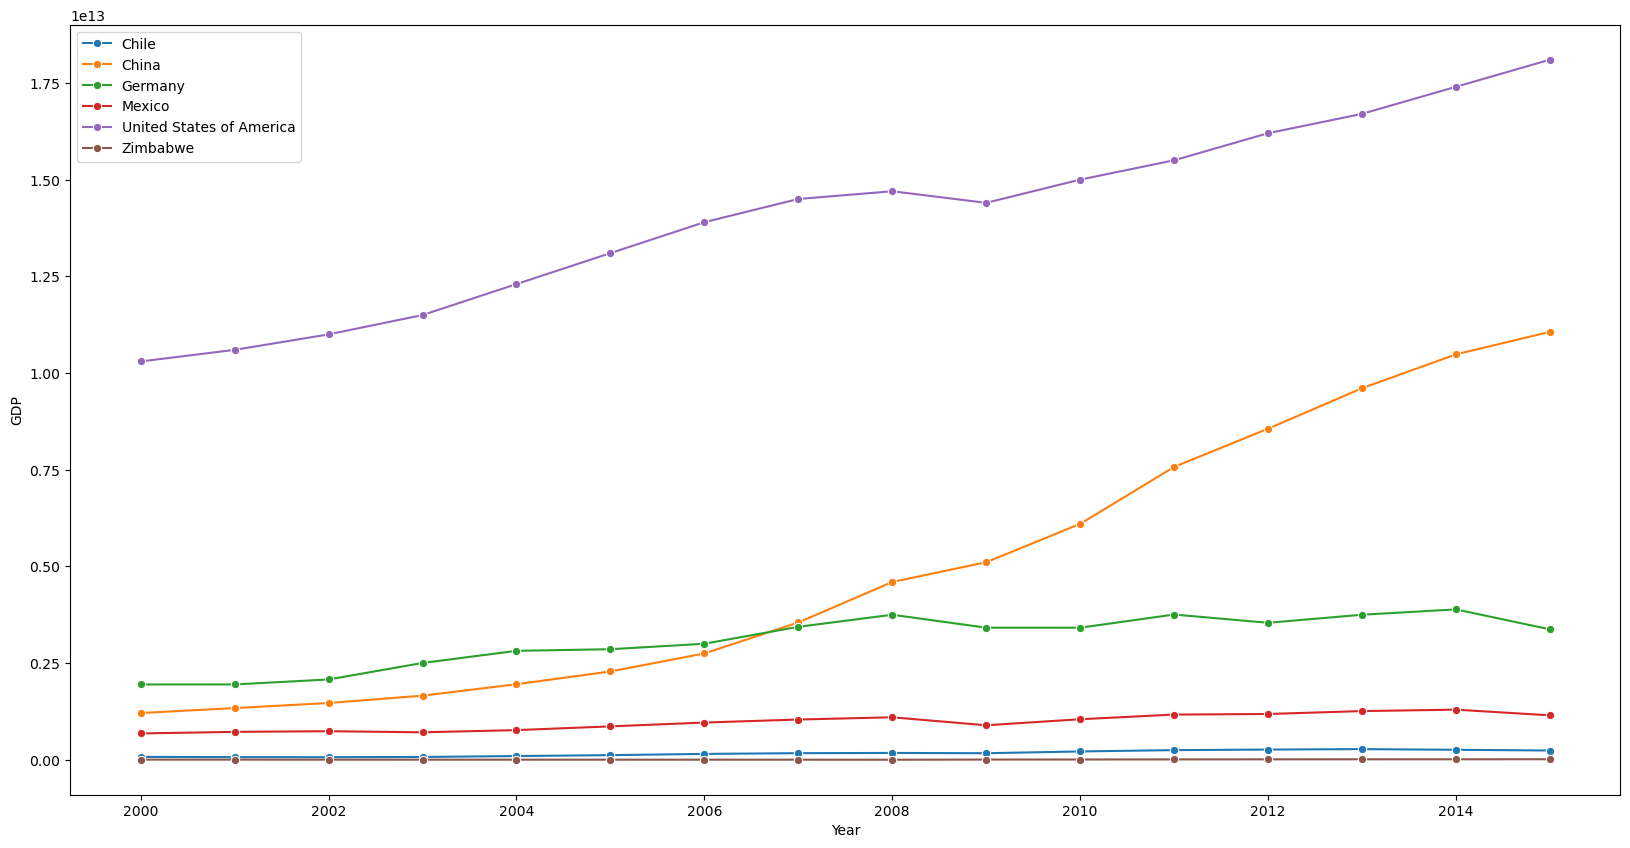

In [151]:
# Create axes objects that share properties among x and y axes
plt.figure(figsize=(20,10))

# chile_data = gdp_life_all[gdp_life_all.Country == 'Chile']
sns.lineplot(x='Year',y='GDP',data=gdp_life_all[gdp_life_all.Country == 'Chile'],marker='o')
sns.lineplot(x='Year',y='GDP',data=gdp_life_all[gdp_life_all.Country == 'China'],marker='o')
sns.lineplot(x='Year',y='GDP',data=gdp_life_all[gdp_life_all.Country == 'Germany'],marker='o')
sns.lineplot(x='Year',y='GDP',data=gdp_life_all[gdp_life_all.Country == 'Mexico'],marker='o')
sns.lineplot(x='Year',y='GDP',data=gdp_life_all[gdp_life_all.Country == 'United States of America'],marker='o')
sns.lineplot(x='Year',y='GDP',data=gdp_life_all[gdp_life_all.Country == 'Zimbabwe'],marker='o')
plt.legend(list_of_legend)